In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("DRG_hospital_rating_ownertype.csv",encoding='mac_roman')  #for csv files that from a mac computer
data2 =pd.read_csv("LH_merged_withbedcount.csv",encoding='mac_roman')  #for csv files that from a mac computer

In [241]:
#selecting columns i care about, i don't know why theres two beds. I cleaned it later tho. 
data1 = data[['Provider Id','Provider Name','Hospital Type', 'Hospital Ownership', 'Hospital overall rating']]
data2 = data2[['Provider Id', 'Provider Name','BEDS', 'BEDS']]

In [242]:
df = pd.merge(data1, data2, how=  "inner", on = 'Provider Id') #merge two data together 

In [243]:
df = df.iloc[:,:-1] #delet the duplicate "BEDS" columns

In [244]:
df = df.drop(['Provider Name_y', 'Hospital Type'], axis =1) #delete more columns


In [245]:
df = df.rename(columns={'Provider Name_x':'Provider name'}) #cleaning data

In [246]:
df.columns

Index(['Provider Id', 'Provider name', 'Hospital Ownership',
       'Hospital overall rating', 'BEDS'],
      dtype='object')

In [247]:
df =df.drop_duplicates() #cleaning up duplicated rows 

In [248]:
df["Hospital Ownership"].value_counts()

Voluntary non-profit - Private                 969
Proprietary                                    463
Voluntary non-profit - Other                   258
Voluntary non-profit - Church                  241
Government - Hospital District or Authority    220
Government - Local                             141
Physician                                       26
Government - State                              22
Government - Federal                             9
Name: Hospital Ownership, dtype: int64

In [249]:
df["Hospital Ownership"].unique()

array(['Government - Hospital District or Authority',
       'Voluntary non-profit - Private', 'Government - State',
       'Proprietary', 'Voluntary non-profit - Church',
       'Voluntary non-profit - Other', 'Government - Local', 'Physician',
       'Government - Federal'], dtype=object)

In [250]:
#grouping catagory into Hospital ownership: Voluntary(non-profit), Government, Individual business
df["Hospital Ownership"] = df["Hospital Ownership"].replace({
    'Voluntary non-profit - Private':'Voluntary(non-profit)',
    'Voluntary non-profit - Church':'Voluntary(non-profit)',
    'Voluntary non-profit - Other':'Voluntary(non-profit)', 
    'Government - Hospital District or Authority': 'Government',
    'Government - State': 'Government',
    'Government - Local': 'Government',
    'Government - Federal': 'Government',
    'Proprietary': 'Individual Business',
     'Physician': 'Individual Business'
                                 
                                 })

In [251]:
df =df.reset_index()
df.head()

,index,Provider Id,Provider name,Hospital Ownership,Hospital overall rating,BEDS
0,0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,420.0
1,8464,10005,MARSHALL MEDICAL CENTER SOUTH,Government,2,150.0
2,10865,10006,ELIZA COFFEE MEMORIAL HOSPITAL,Government,2,328.0
3,18261,10016,SHELBY BAPTIST MEDICAL CENTER,Voluntary(non-profit),3,252.0
4,24661,10023,BAPTIST MEDICAL CENTER SOUTH,Government,3,226.0


In [252]:
#cleaned data ready for export
df.to_csv("data with provider id_name_hospitalownershipgrouped_rating_BEDS.csv")

In [253]:
df["Hospital Ownership"].value_counts()

Voluntary(non-profit)    1468
Individual Business       489
Government                392
Name: Hospital Ownership, dtype: int64

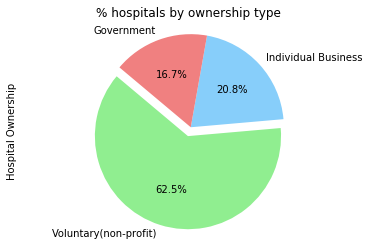

In [254]:
#ploting the percentage of hospitital ownership
df["Hospital Ownership"].value_counts(normalize= True).plot(
    kind = "pie",
    explode=[0.1,0,0],
    colors=["lightgreen", "lightskyblue", "lightcoral"],
    autopct="%1.1f%%",
    shadow=False, 
    startangle=140)
plt.title("% hospitals by ownership type")
plt.axis("equal") 

# plt.savefig("hospitals by ownership type.png")
plt.show()
plt.show()

In [255]:
#Voluntary information
voluntary_capacity = df.loc[df["Hospital Ownership"]=='Voluntary(non-profit)', 'BEDS']
voluntary_rating= df.loc[df["Hospital Ownership"]=='Voluntary(non-profit)', 'Hospital overall rating']
voluntary_color = "lightgreen"


#Government information
gov_capacity = df.loc[df["Hospital Ownership"]=='Government', 'BEDS']
gov_rating= df.loc[df["Hospital Ownership"]=='Government', 'Hospital overall rating']
gov_color = "lightcoral"


#Individual BUsiness
indvidual_capacity = df.loc[df["Hospital Ownership"]=='Individual Business', 'BEDS']
indvidual_rating= df.loc[df["Hospital Ownership"]=='Individual Business', 'Hospital overall rating']
indvidual_color = "lightskyblue"


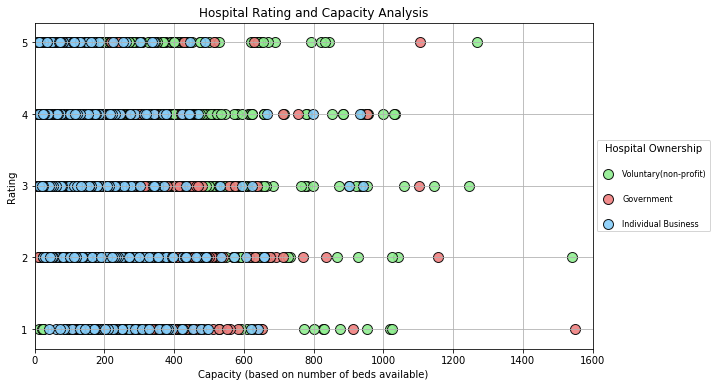

In [256]:
#set figure size before plotting
plt.figure(figsize=(10,6))

#plotting
plt.scatter(x = voluntary_capacity, y =voluntary_rating, s = 100,
             alpha = 0.9, c = voluntary_color , label='Voluntary(non-profit)',
            edgecolor="black", linewidths=1)
plt.scatter(x = gov_capacity, y =gov_rating, s = 100,
             alpha = 0.9, c = gov_color , label='Government',
            edgecolor="black", linewidths=1)
plt.scatter(x = indvidual_capacity, y =indvidual_rating, s = 100,
             alpha = 0.9, c = indvidual_color , label='Individual Business',
            edgecolor="black", linewidths=1)

# adding stuff
plt.title("Hospital Rating and Capacity Analysis")
plt.ylabel("Rating")
plt.xlabel("Capacity (based on number of beds available)")
plt.xlim(0,1600)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="Hospital Ownership" , labelspacing = 2)

plt.show()

In [257]:
#hospital_ownsership_summary
hospital_ownsership_summary = df.groupby('Hospital Ownership')['BEDS','Hospital overall rating'].mean()
hospital_ownsership_summary

,BEDS,Hospital overall rating
Hospital Ownership,,
Government,165.211735,2.984694
Individual Business,174.182004,2.848671
Voluntary(non-profit),220.245913,3.226839


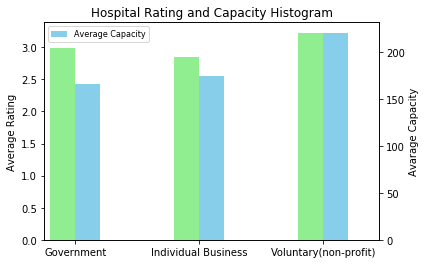

In [258]:
# Bar Graph Version
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

df.groupby('Hospital Ownership')['Hospital overall rating'].mean().plot(
    kind='bar', color='lightgreen', ax=ax, width=width, position=1, label="Average Rating",rot=0)
df.groupby('Hospital Ownership')['BEDS'].mean().plot(
    kind='bar', color='skyblue', ax=ax2, width=width, position=0, label = "Average Capacity",rot=0)

plt.title("Hospital Rating and Capacity Histogram")

ax.set_ylabel('Average Rating')
ax2.set_ylabel('Avarage Capacity')
ax.set_xlabel("")
plt.legend(loc='best',  fontsize=8, labelspacing = 2)


plt.show()



0                Government
1                Government
2                Government
3     Voluntary(non-profit)
4                Government
5                Government
6                Government
7       Individual Business
8       Individual Business
10      Individual Business
12    Voluntary(non-profit)
19      Individual Business
21    Voluntary(non-profit)
24    Voluntary(non-profit)
25    Voluntary(non-profit)
26    Voluntary(non-profit)
29    Voluntary(non-profit)
30    Voluntary(non-profit)
39    Voluntary(non-profit)
40    Voluntary(non-profit)
58    Voluntary(non-profit)
60    Voluntary(non-profit)
61      Individual Business
65      Individual Business
84               Government
Name: Hospital Ownership, dtype: object

In [268]:
df.loc[df['Hospital overall rating']== 5, 'Hospital Ownership'].value_counts()

Voluntary(non-profit)    180
Individual Business       50
Government                17
Name: Hospital Ownership, dtype: int64

In [276]:
df.loc[df['Hospital overall rating']== 4, 'Hospital Ownership'].value_counts()

Voluntary(non-profit)    475
Government               107
Individual Business       95
Name: Hospital Ownership, dtype: int64

In [279]:
df.loc[df['Hospital overall rating']== 3, 'Hospital Ownership'].value_counts()

Voluntary(non-profit)    419
Government               154
Individual Business      126
Name: Hospital Ownership, dtype: int64

In [277]:
df.loc[df['Hospital overall rating']== 2, 'Hospital Ownership'].value_counts()

Voluntary(non-profit)    286
Individual Business      167
Government                81
Name: Hospital Ownership, dtype: int64

In [271]:
df.loc[df['Hospital overall rating']== 1, 'Hospital Ownership'].value_counts()

Voluntary(non-profit)    108
Individual Business       51
Government                33
Name: Hospital Ownership, dtype: int64